 <div class="alert alert-success"> 
<ul>
<li>Current estimates produces highly correlated lexical surprisal estimates compared to Piantadosi et al. (2011) for some Google 1T dataset.</li>
<li>English, French and Spanish are the closest to the previous reported numbers, followed by other Western European Romanc languages.</li>
<li>Polish and Czech have lower correlations. This is likely because they have a higher proportion of non-ASCII characters (everything was reduced to an ASCII string using unidecode for all languages).</li>
</ul>
<br />
Last updated 29 September 2019.
 </div>

In [1]:
library('ggplot2')
library('plyr')
source('freq-vs-info-content_helper.R')
source('config.R')


Attaching package: ‘reshape’


The following objects are masked from ‘package:plyr’:

    rename, round_any


Loading required package: fit.models

Registered S3 methods overwritten by 'robust':
  method              from      
  plot.covfm          fit.models
  print.covfm         fit.models
  summary.covfm       fit.models
  print.summary.covfm fit.models

rlm is already registered in the fit.models registry

covfm is already registered in the fit.models registry


Attaching package: ‘robust’


The following objects are masked from ‘package:fit.models’:

    ddPlot.covfm, distancePlot.covfm, ellipsesPlot.covfm,
    screePlot.covfm




# Spanish #

In [3]:
es = getInfoContentDF(
    paste0(paths[['P11_Google1T']], 'surprisal-SPANISH-3.txt'),
    paste0(paths[['current_unfiltered']], 'Google1T/SPANISH/00_lexicalSurprisal/meanSurprisal.csv'))                      

 [1] "word"                      "frequency.x"              
 [3] "ortho.len"                 "surprisal"                
 [5] "context.count"             "weighted.sd"              
 [7] "max.context.pct"           "min.surprisal"            
 [9] "max.surprisal"             "Q0.99"                    
[11] "Q0.95"                     "Q0.5"                     
[13] "Q0.05"                     "Q0.01"                    
[15] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
[17] "frequency.y"               "numContexts"              
[19] "retrievalTime"            


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



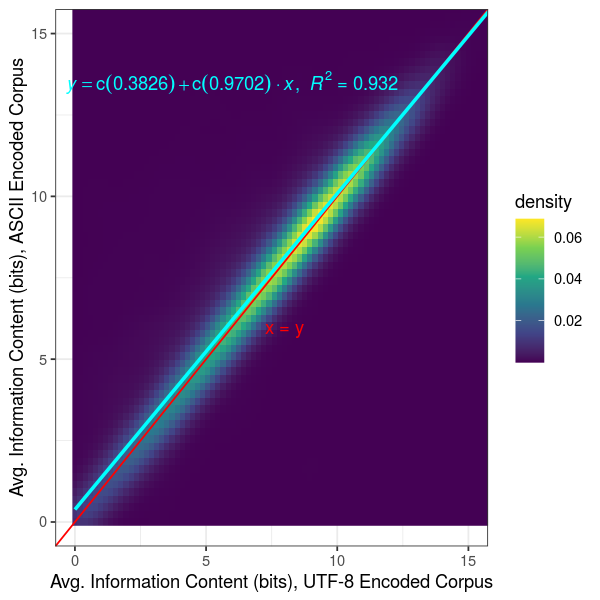

In [6]:
options(repr.plot.width=8, repr.plot.height=6)
getInfoContentPlot(es[1:25000,], 'pdfs/spanish_info_content_comparison.pdf', xlims=c(0,15), ylims = c(0,15))

In [7]:
getInfoContentCor(es[1:25000,])

[[1]]
[[1]]$spearman
[1] 0.9696827

[[1]]$pearson
[1] 0.9656193


[[2]]
[[2]]$spearman
[1] 0.9808793

[[2]]$pearson
[1] 0.975441


[[3]]
[1] 25000

In [8]:
sum(as.numeric(es$frequency.x)) / sum(as.numeric(es$frequency.y)) #I have 20% more tokens

[1] 0.8010776

In [9]:
# Items with lowest residuals
es[order(es$residuals),c('word','mean_surprisal_weighted','surprisal')][1:5,]

,word,mean_surprisal_weighted,surprisal
,<chr>,<dbl>,<dbl>
11629,desembre,8.936018,1.346
37116,tivas,7.177050,0.000
21552,juny,8.934668,1.735
21527,juliol,9.076777,1.878
26255,novembre,8.123543,1.350


In [10]:
# Items with highest residuals
es[order(es$residuals, decreasing=T),c('word','mean_surprisal_weighted','surprisal')][1:5,]

,word,mean_surprisal_weighted,surprisal
,<chr>,<dbl>,<dbl>
24545,midlet,0.10525784,17.897
19366,iembro,6.30247560,22.920
5901,caltojar,0.09976756,16.753
17757,gobiernas,0.51837702,16.928
25928,neutronic,0.03133576,16.069


# French #

In [11]:
fr = getInfoContentDF(
    paste0(paths[['P11_Google1T']], 'surprisal-FRENCH-3.txt'),    
    paste0(paths[['current_unfiltered']], 'Google1T/FRENCH/00_lexicalSurprisal/meanSurprisal.csv'))                      

 [1] "word"                      "frequency.x"              
 [3] "ortho.len"                 "surprisal"                
 [5] "context.count"             "weighted.sd"              
 [7] "max.context.pct"           "min.surprisal"            
 [9] "max.surprisal"             "Q0.99"                    
[11] "Q0.95"                     "Q0.5"                     
[13] "Q0.05"                     "Q0.01"                    
[15] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
[17] "frequency.y"               "numContexts"              
[19] "retrievalTime"            


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



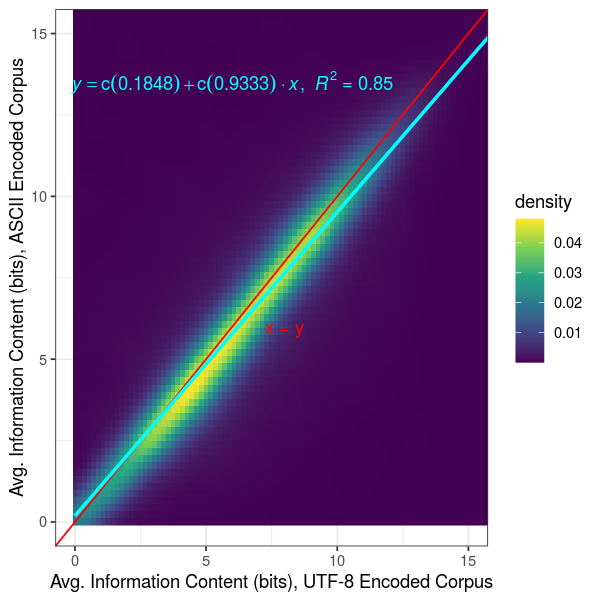

In [12]:
getInfoContentPlot(fr[1:25000,], 'pdfs/french_info_content_comparison.pdf', xlims = c(0,15),
    ylims = c(0,15))

In [13]:
getInfoContentCor(fr)

[[1]]
[[1]]$spearman
[1] 0.9329268

[[1]]$pearson
[1] 0.9282007


[[2]]
[[2]]$spearman
[1] 0.9450237

[[2]]$pearson
[1] 0.9444227


[[3]]
[1] 36372

In [14]:
sum(as.numeric(fr$frequency.x)) /sum(as.numeric(fr$frequency.y)) # I have 34% more tokens

[1] 0.6470728

In [15]:
# Items with lowest residuals
fr[order(fr$residuals),c('word','mean_surprisal_weighted','surprisal')][1:5,]

,word,mean_surprisal_weighted,surprisal
,<chr>,<dbl>,<dbl>
23088,oblast,11.22640,0.000
23101,obol,10.48133,0.000
17902,jelsoft,13.33628,2.705
26989,pvo,11.96734,1.568
2403,asean,12.84144,2.491


In [16]:
# Items with highest residuals
fr[order(fr$residuals, decreasing=T),c('word','mean_surprisal_weighted','surprisal')][1:5,]

,word,mean_surprisal_weighted,surprisal
,<chr>,<dbl>,<dbl>
18539,kleptomanie,0.027402063,21.432
33849,travestisme,0.008220539,20.383
29034,roaring,0.080531724,18.098
33970,trisomies,0.089966844,18.073
28651,retapez,0.316153174,16.648


# English #

In [17]:
en = getInfoContentDF(
    paste0(paths[['P11_Google1T']], 'surprisal-ENGLISH-3.txt'),    
    paste0(paths[['current_unfiltered']], 'Google1T/ENGLISH/00_lexicalSurprisal/meanSurprisal.csv'))                      

 [1] "word"                      "frequency.x"              
 [3] "ortho.len"                 "surprisal"                
 [5] "context.count"             "weighted.sd"              
 [7] "max.context.pct"           "min.surprisal"            
 [9] "max.surprisal"             "Q0.99"                    
[11] "Q0.95"                     "Q0.5"                     
[13] "Q0.05"                     "Q0.01"                    
[15] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
[17] "frequency.y"               "numContexts"              
[19] "retrievalTime"            


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



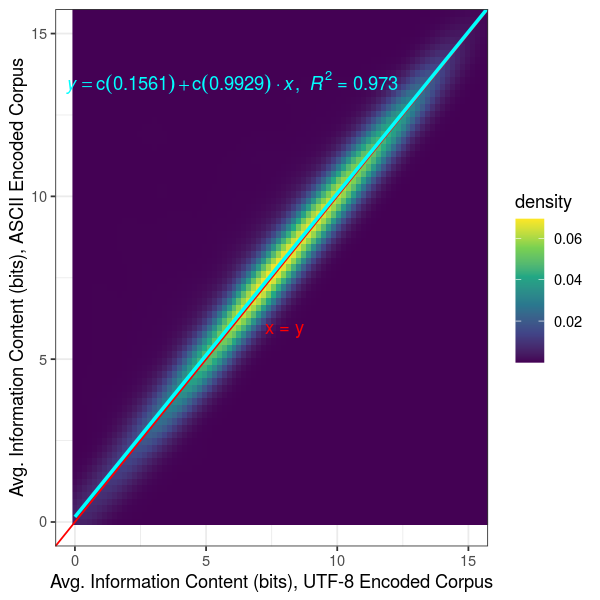

In [18]:
getInfoContentPlot(en[1:25000,], 'pdfs/english_info_content_comparison.pdf', xlims = c(0,15),
    ylims = c(0,15))

In [19]:
print(getInfoContentCor(en))

[[1]]
[[1]]$spearman
[1] 0.9869952

[[1]]$pearson
[1] 0.9851471


[[2]]
[[2]]$spearman
[1] 0.9924682

[[2]]$pearson
[1] 0.9912048


[[3]]
[1] 45947



In [20]:
sum(as.numeric(en$frequency.x))/ sum(as.numeric(en$frequency.y)) 

[1] 0.9477899

# German #

In [21]:
de = getInfoContentDF(
    paste0(paths[['P11_Google1T']], 'surprisal-GERMAN-3.txt'),    
    paste0(paths[['current_unfiltered']], 'Google1T/GERMAN/00_lexicalSurprisal/meanSurprisal.csv'))                      

 [1] "word"                      "frequency.x"              
 [3] "ortho.len"                 "surprisal"                
 [5] "context.count"             "weighted.sd"              
 [7] "max.context.pct"           "min.surprisal"            
 [9] "max.surprisal"             "Q0.99"                    
[11] "Q0.95"                     "Q0.5"                     
[13] "Q0.05"                     "Q0.01"                    
[15] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
[17] "frequency.y"               "numContexts"              
[19] "retrievalTime"            


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



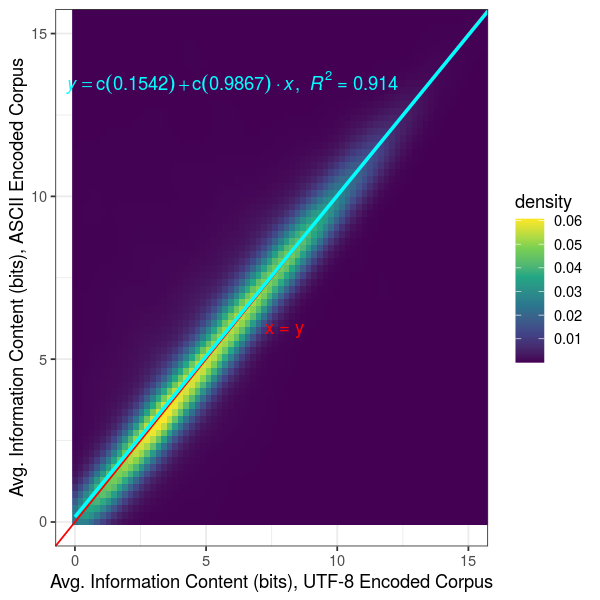

In [22]:
getInfoContentPlot(de[1:25000,], 'pdfs/german_info_content_comparison.pdf', xlims = c(0,15),
    ylims = c(0,15))

In [23]:
getInfoContentCor(de)

[[1]]
[[1]]$spearman
[1] 0.9566488

[[1]]$pearson
[1] 0.954503


[[2]]
[[2]]$spearman
[1] 0.971741

[[2]]$pearson
[1] 0.9681357


[[3]]
[1] 41095

In [24]:
sum(as.numeric(de$frequency.x))/ sum(as.numeric(de$frequency.y)) # current finds slightly more tokens

[1] 0.8066806

# Dutch #

In [25]:
nl = getInfoContentDF(    
    paste0(paths[['P11_Google1T']], 'surprisal-DUTCH-3.txt'),    
    paste0(paths[['current_unfiltered']], 'Google1T/DUTCH/00_lexicalSurprisal/meanSurprisal.csv'))                      

 [1] "word"                      "frequency.x"              
 [3] "ortho.len"                 "surprisal"                
 [5] "context.count"             "weighted.sd"              
 [7] "max.context.pct"           "min.surprisal"            
 [9] "max.surprisal"             "Q0.99"                    
[11] "Q0.95"                     "Q0.5"                     
[13] "Q0.05"                     "Q0.01"                    
[15] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
[17] "frequency.y"               "numContexts"              
[19] "retrievalTime"            


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



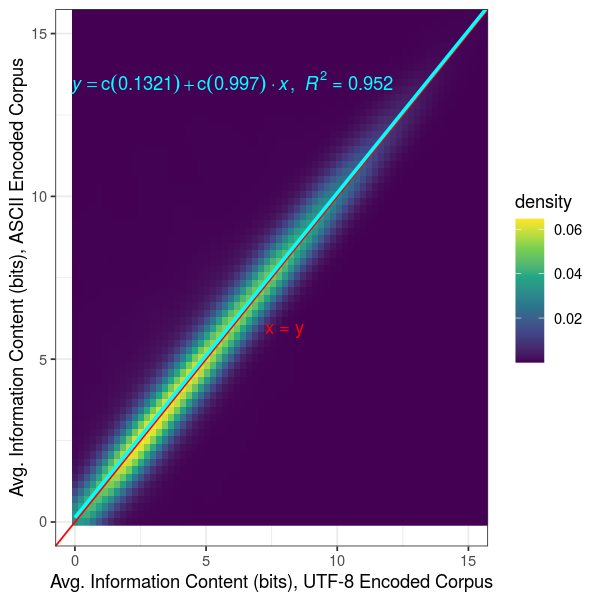

In [26]:
getInfoContentPlot(nl[1:25000,], 'pdfs/french_info_content_comparison.pdf', xlims = c(0,15),
    ylims = c(0,15))

In [27]:
getInfoContentCor(nl)

[[1]]
[[1]]$spearman
[1] 0.9755202

[[1]]$pearson
[1] 0.9753042


[[2]]
[[2]]$spearman
[1] 0.9786476

[[2]]$pearson
[1] 0.9711925


[[3]]
[1] 40046

In [28]:
sum(as.numeric(nl$frequency.x))/ sum(as.numeric(nl$frequency.y)) #current finds the same number of tokens

[1] 0.9202308

# Czech #

In [29]:
cs = getInfoContentDF(
    paste0(paths[['P11_Google1T']], 'surprisal-CZECH-3.txt'),    
paste0(paths[['current_unfiltered']], 'Google1T/CZECH/00_lexicalSurprisal/meanSurprisal.csv'))                      

 [1] "word"                      "frequency.x"              
 [3] "ortho.len"                 "surprisal"                
 [5] "context.count"             "weighted.sd"              
 [7] "max.context.pct"           "min.surprisal"            
 [9] "max.surprisal"             "Q0.99"                    
[11] "Q0.95"                     "Q0.5"                     
[13] "Q0.05"                     "Q0.01"                    
[15] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
[17] "frequency.y"               "numContexts"              
[19] "retrievalTime"            



Call:
lm(formula = surprisal ~ mean_surprisal_weighted, data = cs)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9603 -0.6812 -0.3696  0.3588 15.5001 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.462595   0.016422   28.17   <2e-16 ***
mean_surprisal_weighted 0.894355   0.005324  167.99   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.383 on 21744 degrees of freedom
Multiple R-squared:  0.5648,	Adjusted R-squared:  0.5648 
F-statistic: 2.822e+04 on 1 and 21744 DF,  p-value: < 2.2e-16



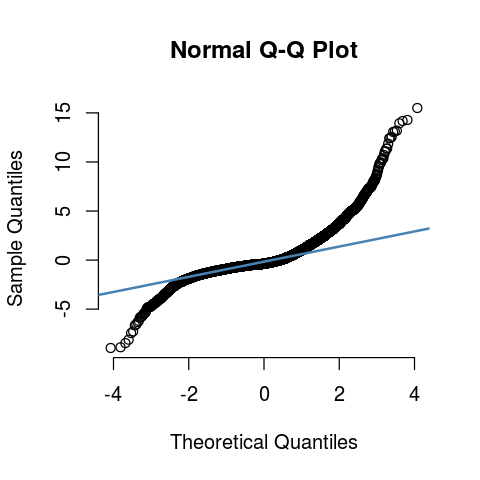

In [30]:
lm1 = lm(surprisal ~ mean_surprisal_weighted, cs)
resid = lm1$residuals
options(repr.plot.width=4, repr.plot.height=4)
qqnorm(resid, pch = 1, frame = FALSE)
qqline(resid, col = "steelblue", lwd = 2)
print(summary(lm1))

In [31]:
en$diff = en$surprisal - en$mean_surprisal_weighted

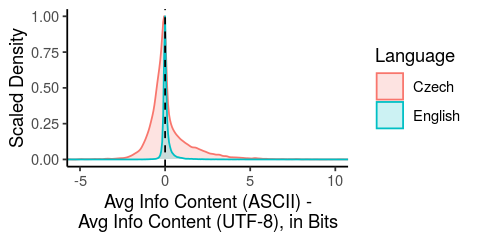

In [32]:
en$language = 'English'
cs$language = 'Czech'
cs_vs_english = rbind.fill(en, cs)
# this is already converted to bits
cs_vs_english$diff = cs_vs_english$surprisal - cs_vs_english$mean_surprisal_weighted
options(repr.plot.width=4, repr.plot.height=2)
p1 = ggplot(cs_vs_english) + geom_density(data=cs_vs_english, aes(x=diff, 
y=..scaled.., colour=language, fill=language), alpha=.2) + coord_cartesian(
xlim=c(-5,10)) + geom_vline(xintercept=0, colour='black', linetype ='dashed'
) + xlab('Avg Info Content (ASCII) -\nAvg Info Content (UTF-8), in Bits'
) + ylab('Scaled Density')  + theme_classic()  + guides(fill=guide_legend(
title="Language"))+ guides(colour=guide_legend(title="Language"))
print(p1)
ggsave('pdfs/czech_info_content_diff.pdf', width=4, height=2)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



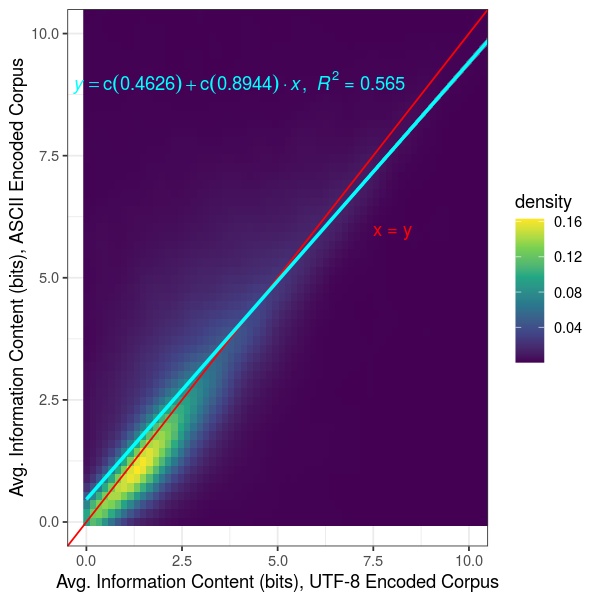

In [33]:
getInfoContentPlot(cs,'pdfs/czech_info_content_comparison.pdf', xlims=c(0,10
), ylims = c(0,10))

In [34]:
getInfoContentCor(cs)

[[1]]
[[1]]$spearman
[1] 0.7705713

[[1]]$pearson
[1] 0.7515377


[[2]]
[[2]]$spearman
[1] 0.8004487

[[2]]$pearson
[1] 0.8144143


[[3]]
[1] 21746

In [35]:
sum(as.numeric(cs$frequency.x))/ sum(as.numeric(cs$frequency.y)) #current finds many more tokens

[1] 0.372729

# Swedish #

In [36]:
sv = getInfoContentDF(
    paste0(paths[['P11_Google1T']], 'surprisal-SWEDISH-3.txt'),    
paste0(paths[['current_unfiltered']], 'Google1T/SWEDISH/00_lexicalSurprisal/meanSurprisal.csv'))                      

 [1] "word"                      "frequency.x"              
 [3] "ortho.len"                 "surprisal"                
 [5] "context.count"             "weighted.sd"              
 [7] "max.context.pct"           "min.surprisal"            
 [9] "max.surprisal"             "Q0.99"                    
[11] "Q0.95"                     "Q0.5"                     
[13] "Q0.05"                     "Q0.01"                    
[15] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
[17] "frequency.y"               "numContexts"              
[19] "retrievalTime"            


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



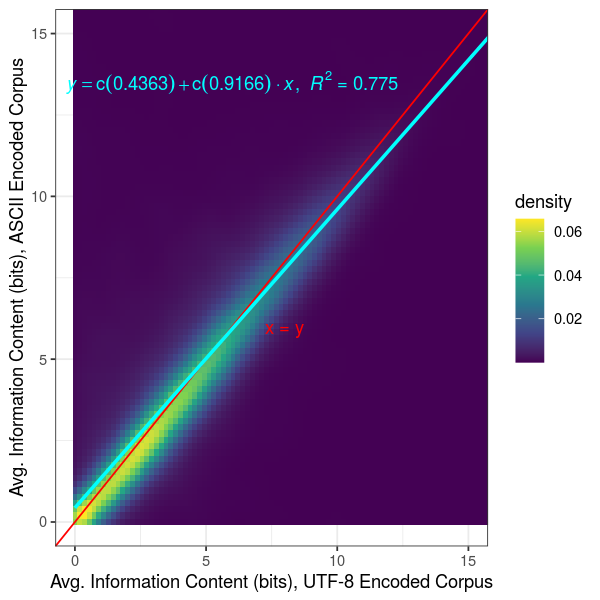

In [37]:
getInfoContentPlot(sv[1:25000,], 'pdfs/swedish_info_content_comparison.pdf', xlims = c(0,15),
    ylims = c(0,15))

In [38]:
getInfoContentCor(sv)

[[1]]
[[1]]$spearman
[1] 0.8880799

[[1]]$pearson
[1] 0.8794975


[[2]]
[[2]]$spearman
[1] 0.9056604

[[2]]$pearson
[1] 0.8958441


[[3]]
[1] 35089

In [39]:
print(sum(as.numeric(sv$frequency.x)))
sum(as.numeric(sv$frequency.x))/ sum(as.numeric(sv$frequency.y)) #current finds  50% more tokens
# 8,944,073,669

[1] 11282248550


[1] 0.5586034

# Polish #

In [40]:
pl = getInfoContentDF(
    paste0(paths[['P11_Google1T']], 'surprisal-POLISH-3.txt'),    
    paste0(paths[['current_unfiltered']], 'Google1T/POLISH/00_lexicalSurprisal/meanSurprisal.csv'))                      

 [1] "word"                      "frequency.x"              
 [3] "ortho.len"                 "surprisal"                
 [5] "context.count"             "weighted.sd"              
 [7] "max.context.pct"           "min.surprisal"            
 [9] "max.surprisal"             "Q0.99"                    
[11] "Q0.95"                     "Q0.5"                     
[13] "Q0.05"                     "Q0.01"                    
[15] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
[17] "frequency.y"               "numContexts"              
[19] "retrievalTime"            


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



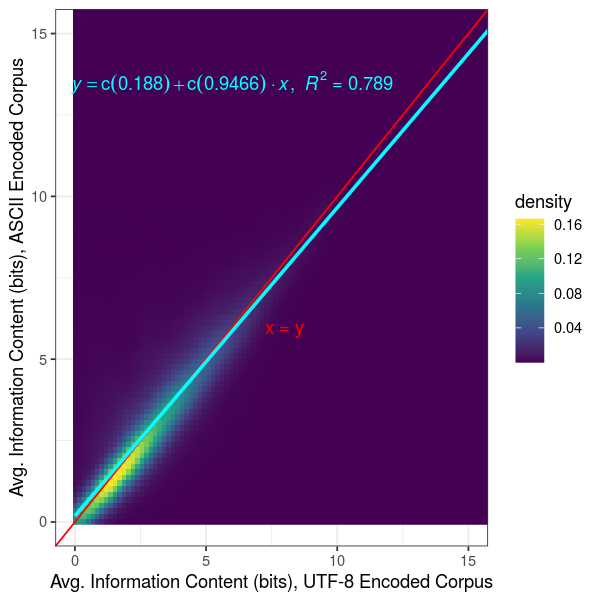

In [41]:
getInfoContentPlot(pl[1:25000,], 'pdfs/polish_info_content_comparison.pdf', xlims = c(0,15),
    ylims = c(0,15))

In [42]:
getInfoContentCor(pl)

[[1]]
[[1]]$spearman
[1] 0.8961264

[[1]]$pearson
[1] 0.8866969


[[2]]
[[2]]$spearman
[1] 0.9152029

[[2]]$pearson
[1] 0.9163377


[[3]]
[1] 33465

In [43]:
sum(as.numeric(pl$frequency.x))/ sum(as.numeric(pl$frequency.y)) #current finds  40% more tokens

[1] 0.5817388

# Romanian #

In [45]:
ro = getInfoContentDF(
    paste0(paths[['P11_Google1T']], 'surprisal-ROMANIAN-3.txt'),    
    paste0(paths[['current_unfiltered']], 'Google1T/ROMANIAN/00_lexicalSurprisal/meanSurprisal.csv'))                      

 [1] "word"                      "frequency.x"              
 [3] "ortho.len"                 "surprisal"                
 [5] "context.count"             "weighted.sd"              
 [7] "max.context.pct"           "min.surprisal"            
 [9] "max.surprisal"             "Q0.99"                    
[11] "Q0.95"                     "Q0.5"                     
[13] "Q0.05"                     "Q0.01"                    
[15] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
[17] "frequency.y"               "numContexts"              
[19] "retrievalTime"            


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



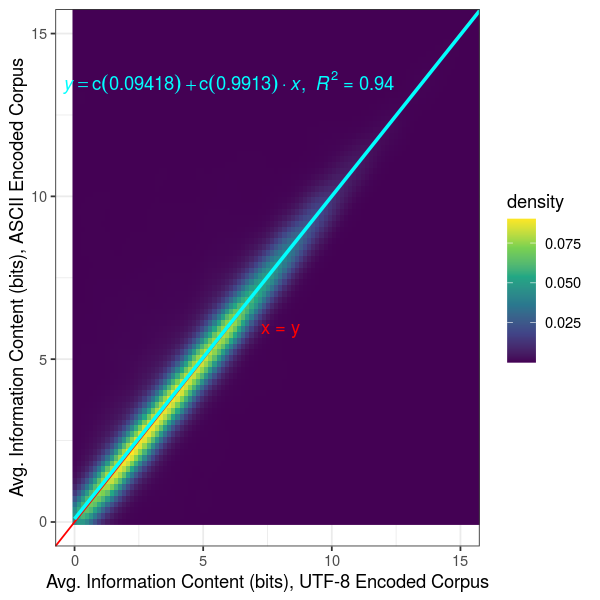

In [46]:
getInfoContentPlot(ro[1:25000,], 'pdfs/romanian_info_content_comparison.pdf', xlims = c(0,15),
    ylims = c(0,15))

In [47]:
getInfoContentCor(ro)

[[1]]
[[1]]$spearman
[1] 0.9722654

[[1]]$pearson
[1] 0.9699043


[[2]]
[[2]]$spearman
[1] 0.9796072

[[2]]$pearson
[1] 0.974646


[[3]]
[1] 42089

In [48]:
sum(as.numeric(ro$frequency.x))/ sum(as.numeric(ro$frequency.y)) #current finds  10% more tokens

[1] 0.8635209

# Italian #

In [50]:
it = getInfoContentDF(
    paste0(paths[['P11_Google1T']], 'surprisal-ITALIAN-3.txt'),        
    paste0(paths[['current_unfiltered']], 'Google1T/ITALIAN/00_lexicalSurprisal/meanSurprisal.csv'))                      

 [1] "word"                      "frequency.x"              
 [3] "ortho.len"                 "surprisal"                
 [5] "context.count"             "weighted.sd"              
 [7] "max.context.pct"           "min.surprisal"            
 [9] "max.surprisal"             "Q0.99"                    
[11] "Q0.95"                     "Q0.5"                     
[13] "Q0.05"                     "Q0.01"                    
[15] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
[17] "frequency.y"               "numContexts"              
[19] "retrievalTime"            


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



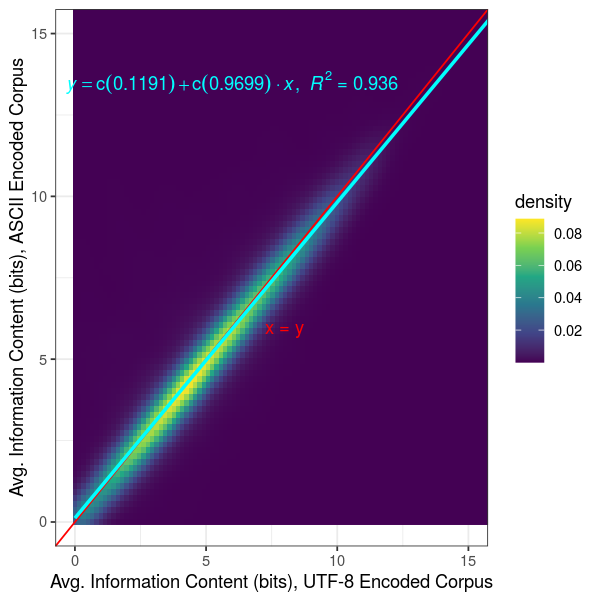

In [51]:
getInfoContentPlot(it[1:25000,], 'pdfs/italian_info_content_comparison.pdf', xlims = c(0,15),
    ylims = c(0,15))

In [52]:
getInfoContentCor(it)

[[1]]
[[1]]$spearman
[1] 0.9719011

[[1]]$pearson
[1] 0.9705724


[[2]]
[[2]]$spearman
[1] 0.9754421

[[2]]$pearson
[1] 0.9724679


[[3]]
[1] 44888

In [53]:
sum(as.numeric(it$frequency.x))/ sum(as.numeric(it$frequency.y)) #current finds 10% more tokens

[1] 0.8629729

# Portuguese #

In [56]:
pt = getInfoContentDF(
    paste0(paths[['P11_Google1T']], 'surprisal-PORTUGUESE-3.txt'),    
    paste0(paths[['current_unfiltered']], 'Google1T/PORTUGUESE/00_lexicalSurprisal/meanSurprisal.csv'))

 [1] "word"                      "frequency.x"              
 [3] "ortho.len"                 "surprisal"                
 [5] "context.count"             "weighted.sd"              
 [7] "max.context.pct"           "min.surprisal"            
 [9] "max.surprisal"             "Q0.99"                    
[11] "Q0.95"                     "Q0.5"                     
[13] "Q0.05"                     "Q0.01"                    
[15] "mean_surprisal_weighted"   "mean_surprisal_unweighted"
[17] "frequency.y"               "numContexts"              
[19] "retrievalTime"            


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



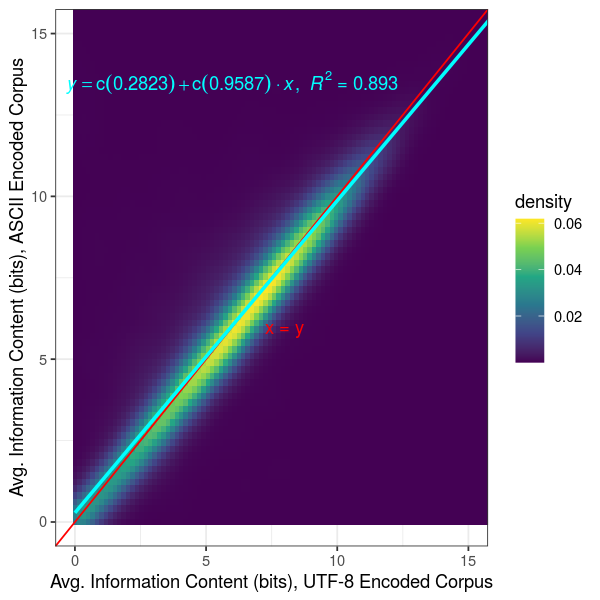

In [57]:
getInfoContentPlot(pt[1:25000,], 'pdfs/portuguese_info_content_comparison.pdf', xlims = c(0,15),
    ylims = c(0,15))

In [58]:
getInfoContentCor(pt)

[[1]]
[[1]]$spearman
[1] 0.9493941

[[1]]$pearson
[1] 0.9474335


[[2]]
[[2]]$spearman
[1] 0.9668943

[[2]]$pearson
[1] 0.9649776


[[3]]
[1] 39046

In [59]:
sum(as.numeric(pt$frequency.x))/ sum(as.numeric(pt$frequency.y)) #current finds 30% more tokens

[1] 0.7155956